# Chapter 1 – The Machine Learning Landscape

Training and Running a linear model from scikit-learn

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


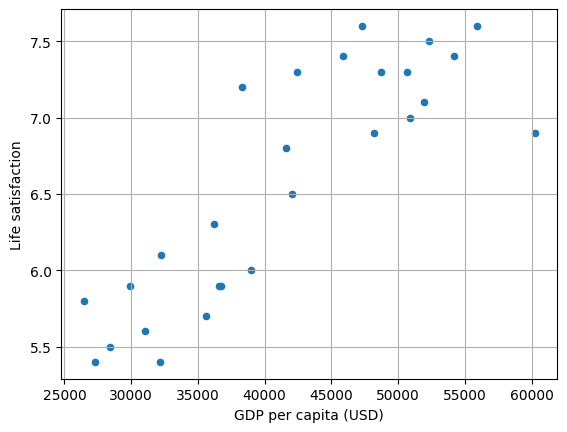

Linear Regression: [[5.54250089]]
KNeighborsRegressor [[5.66666667]]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")

display(lifesat.head())

lifesat.plot(kind="scatter", grid=True, x = "GDP per capita (USD)", y = "Life satisfaction")
# plt.axis([23_500, 62_500, 4, 9])
plt.show()

X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values


model = LinearRegression()

model.fit(X, y)

print(f"Linear Regression: {model.predict([[26456.38]])}")

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X,y)
print(f"KNeighborsRegressor {model.predict([[29932.493910]])}")


Chapter 2: End-to-Endd Machine Learning

In [2]:
# Download data
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets", filter="data")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing_full = load_housing_data()

In [3]:
housing_full.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_full['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [6]:
housing_full.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


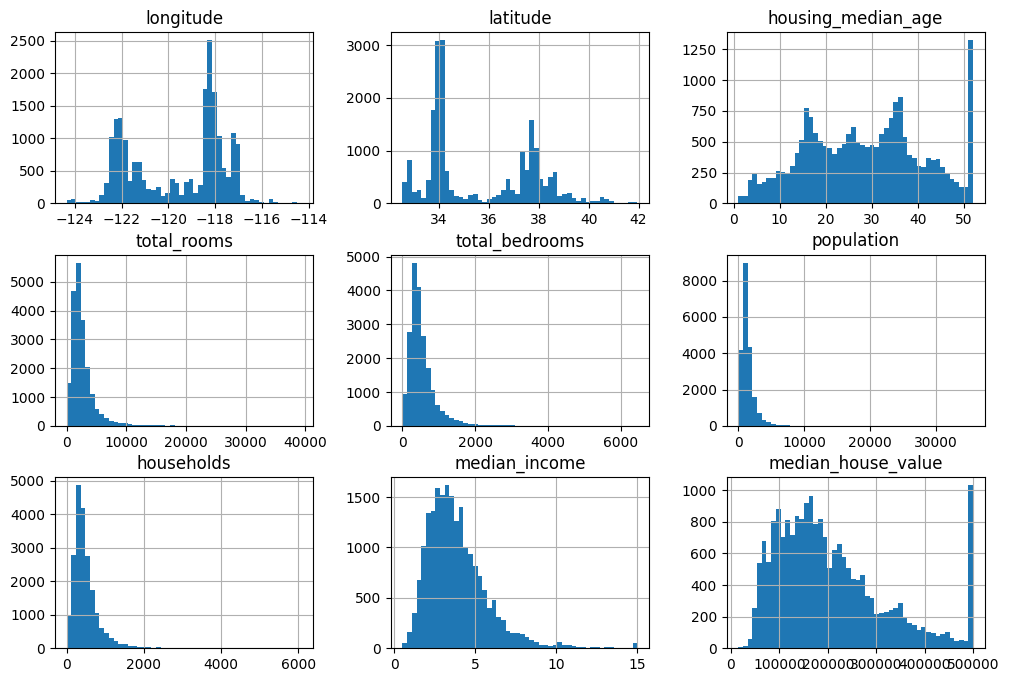

In [7]:
import matplotlib.pyplot as plt

housing_full.hist(bins=50, figsize = (12, 8))
plt.show()

In [8]:
# Train Test split
from sklearn.model_selection import train_test_split
import numpy as np

train_set, test_set = train_test_split(housing_full, test_size=0.2, random_state=42)
print(len(train_set), len(test_set))

# before using group based split we need to create a group
housing_full['income_cat'] = pd.cut(
    housing_full['median_income'],
    bins=[0,1.5,3,4.5,6,np.inf],
    labels=[1,2,3,4,5]
)

16512 4128


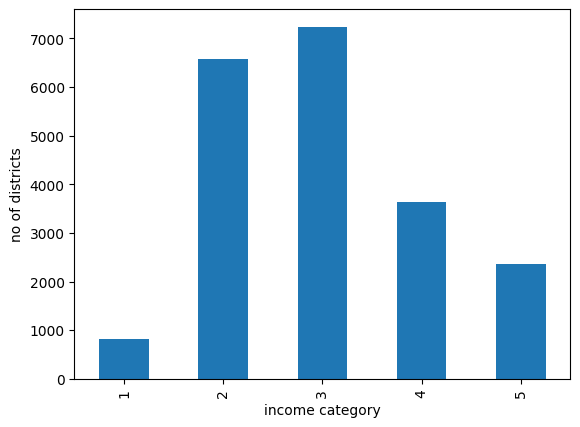

In [9]:
cat_counts = housing_full['income_cat'].value_counts().sort_index()
cat_counts.plot.bar()
plt.xlabel('income category')
plt.ylabel('no of districts')
plt.show()

In [10]:
strat_train_set, strat_test_set = train_test_split(housing_full, test_size=0.2, random_state=42, stratify=housing_full['income_cat'])
print(len(train_set), len(test_set))

16512 4128


In [11]:
# using stratify method yield almost similar category random split but if we use only by randomness it will yield skewed
display(strat_test_set['income_cat'].value_counts()/ len(strat_test_set))
display(housing_full['income_cat'].value_counts()/len(housing_full))

# we don't the income_cat column further since we already splitted the data based on that
for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat',axis =1, inplace=True)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


,count
income_cat,
3,0.350581
2,0.318847
4,0.176308
5,0.114438
1,0.039826


### Explore and visualize the data to gain more insights

In [12]:
housing = strat_train_set.copy()

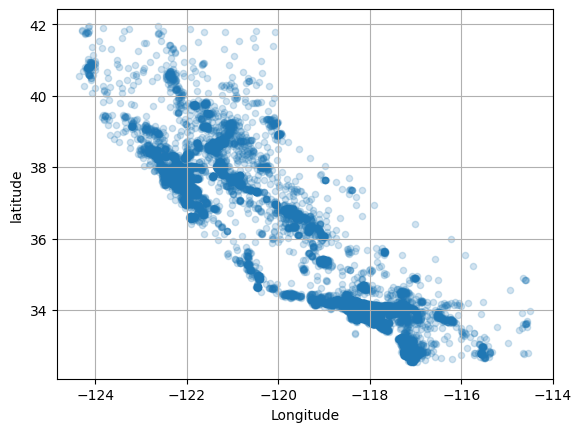

In [13]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid = True, alpha=0.2)
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

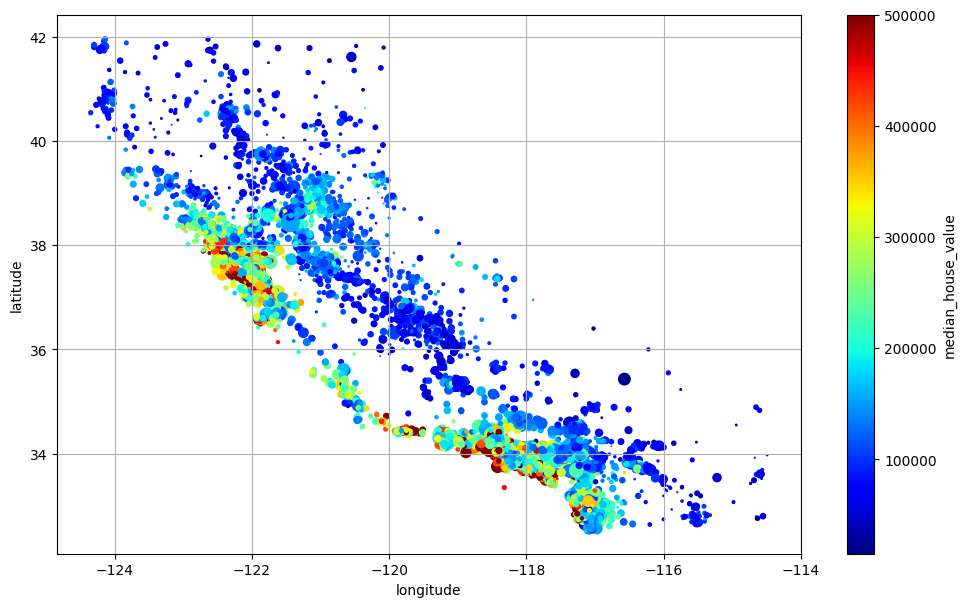

In [14]:
# Adding much more detailing
housing.plot(
    kind='scatter', x='longitude', y='latitude', grid=True, s=housing['population']/100, c='median_house_value', cmap='jet',
    legend=True,figsize=(12,7)
)


In [15]:
# Finding Correlation
corr_matrix = housing.corr(numeric_only = True)
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


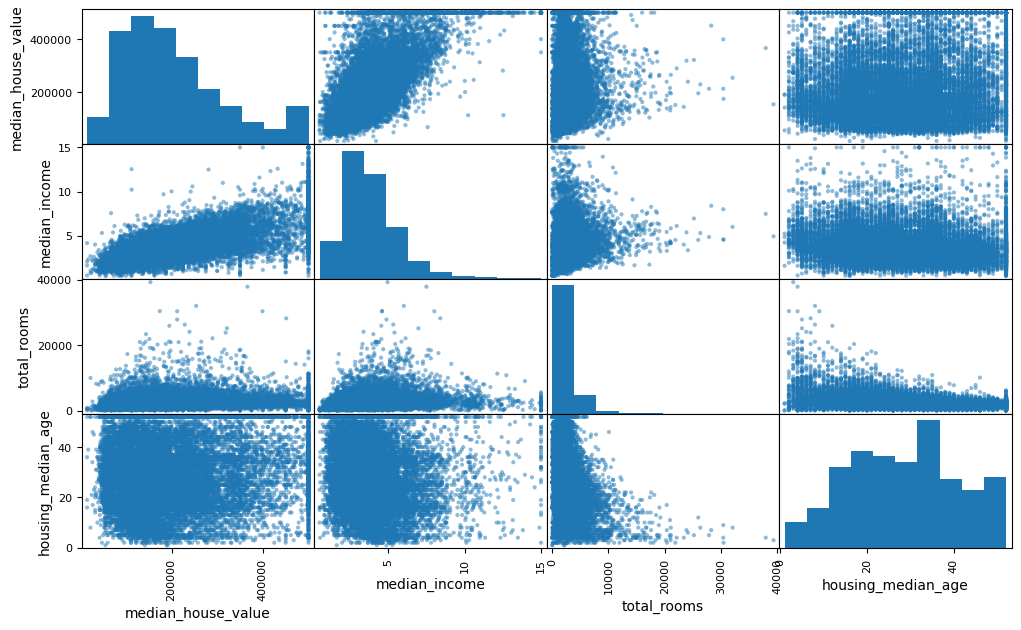

In [16]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,7))

plt.show()

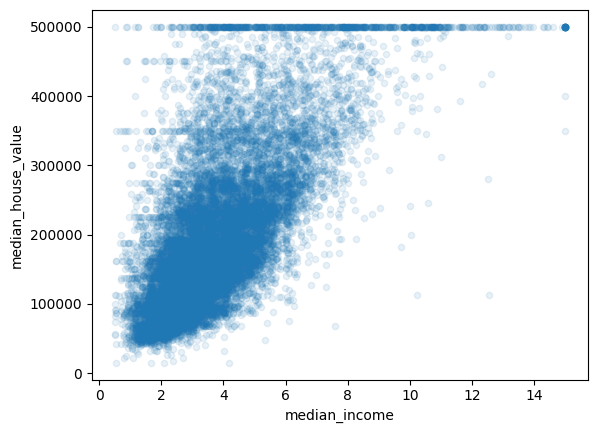

In [17]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)
plt.show()

In [18]:
#Attribute
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

In [19]:
housing.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859,-0.027899,0.087802,0.024587
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584,0.108037,-0.108871,-0.026457
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175,-0.153900,0.139119,0.012771
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455,0.128631,-0.183273,-0.037702
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635,0.001569,0.089931,-0.045017
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153,-0.076603,0.042698,0.085204
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426,-0.082242,0.072046,-0.042452
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380,0.314316,-0.619958,-0.006662
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000,0.143663,-0.256397,-0.038224
rooms_per_house,-0.027899,0.108037,-0.153900,0.128631,0.001569,-0.076603,-0.082242,0.314316,0.143663,1.000000,-0.402221,0.003868


In [20]:
# new bedrooms_ratio attribute is much more correlated with the median house value than the total number of rooms or bedrooms
# The number of rooms per household is also more informative than the total number of rooms in a district


Prepare data for ML Model

In [21]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [22]:
# Finding null rows
housing.loc[housing.isnull().any(axis = 1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [23]:
# Cleaning the data
# Handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')
housing_num = housing.select_dtypes(include=np.number)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [24]:
print(imputer.statistics_)
print(housing_num.median().values)

[-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]
[-118.51     34.26     29.     2125.      434.     1167.      408.
    3.5385]


In [25]:
X = imputer.transform(housing_num) # Result in numpy arr
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)
housing_tr.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876


In [26]:
# Remove outlier
from sklearn.ensemble import IsolationForest

# isolation_forest = IsolationForest(random_state = 42)
# outlier_index = isolation_forest.fit_predict(X)

# # housing = housing.iloc[outlier_index == 1]
# housing_cat = housing.iloc[outlier_index == 1]

In [27]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [28]:
# work with text attributes
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print(housing_cat_encoded)
print(ordinal_encoder.categories_)
# Housing parameter doesn't in order, so onehotencoding will be better

[[3.]
 [0.]
 [1.]
 ...
 [4.]
 [0.]
 [4.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [29]:
from sklearn.preprocessing import OneHotEncoder

oh_encoder = OneHotEncoder(sparse_output = False)
housing_cat_encoded = oh_encoder.fit_transform(housing_cat)

df_output = pd.DataFrame(housing_cat_encoded, columns = oh_encoder.get_feature_names_out())
df_output.head(3)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0


### Feature Scaling

In [31]:
housing_num.head


<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income  
13096      1576.0      1034.0         2.0987  
14973       666.0       357.0         6.0876  
3785        562.0       203.0         2.4330  
14689      1845.0       780.0         2.2618  
20507      1912.0      1172.0         3.5292  
...           ...         ...            ...  
14207       938.0       523.0         4.7105  
13105      1419.0       532.0         2.5733  
19301      2814.0       760.0         4.0616  
19121      1725.0       838.0         4.1455  
19888       682.0       212.0         3.2833  

[16512 rows x 8 columns]>